In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Cardiotocographic.csv")

In [2]:
df.head(15)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.000000,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.000000,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.000000,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.000000,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.000000,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.000000,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.000000,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.000000,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.000000,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.000000,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.000000,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.000000,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.000000,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.000000,10.6,68.000000,1.000000,3.000000


In [3]:
df.shape#this gives the no of rows and columns of the data

(2126, 14)

In [4]:
df.info()#this gives the total information of the data
#As we have all columns as float no data inconsistency is present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


1.	Data Cleaning and Preparation:

In [7]:
df1=df[['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Tendency','NSP']]
df1.isnull().sum()
#checking weather there are null values in the columns.

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [8]:
df1=df1.fillna(df1.mean())
df1
#Filling the null values with the mean. 

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [9]:
df1.isnull().sum()
#cross checking weather all the null values are filled by the mean.

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [10]:
#  Finding the oulliers

Q1=df['LB'].quantile(0.25)
Q3=df['LB'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['LB']<lower_bound) | (df['LB']>upper_bound)].shape[0]
print("count of outlier for LB",outliers_count)
print()

outliers=df.loc[(df['LB']<lower_bound)|(df['LB']>upper_bound),'LB']
print(outliers)
print()
print("****************************************************************************")

Q1=df['AC'].quantile(0.25)
Q3=df['AC'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['AC']<lower_bound) | (df['AC']>upper_bound)].shape[0]
print("count of outlier for AC",outliers_count)
print()

outliers=df.loc[(df['AC']<lower_bound)|(df['AC']>upper_bound),'AC']
print(outliers)
print()
print("****************************************************************************")

Q1=df['FM'].quantile(0.25)
Q3=df['FM'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['FM']<lower_bound) | (df['FM']>upper_bound)].shape[0]
print("count of outlier for FM",outliers_count)
print()

outliers=df.loc[(df['FM']<lower_bound)|(df['FM']>upper_bound),'FM']
print(outliers)
print()
print("****************************************************************************")

Q1=df['UC'].quantile(0.25)
Q3=df['UC'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['UC']<lower_bound) | (df['UC']>upper_bound)].shape[0]
print("count of outlier for UC",outliers_count)
print()

outliers=df.loc[(df['UC']<lower_bound)|(df['UC']>upper_bound),'UC']
print(outliers)
print()
print("****************************************************************************")

Q1=df['DL'].quantile(0.25)
Q3=df['DL'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['DL']<lower_bound) | (df['DL']>upper_bound)].shape[0]
print("count of outlier for DL",outliers_count)
print()

outliers=df.loc[(df['DL']<lower_bound)|(df['DL']>upper_bound),'DL']
print(outliers)
print()
print("****************************************************************************")

Q1=df['DS'].quantile(0.25)
Q3=df['DS'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['DS']<lower_bound) | (df['DS']>upper_bound)].shape[0]
print("count of outlier for DS",outliers_count)
print()

outliers=df.loc[(df['DS']<lower_bound)|(df['DS']>upper_bound),'DS']
print(outliers)
print()
print("****************************************************************************")

Q1=df['DP'].quantile(0.25)
Q3=df['DP'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['DP']<lower_bound) | (df['DP']>upper_bound)].shape[0]
print("count of outlier for DP",outliers_count)
print()

outliers=df.loc[(df['DP']<lower_bound)|(df['DP']>upper_bound),'DP']
print(outliers)
print()
print("****************************************************************************")

Q1=df['ASTV'].quantile(0.25)
Q3=df['ASTV'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['ASTV']<lower_bound) | (df['ASTV']>upper_bound)].shape[0]
print("count of outlier for ASTV",outliers_count)
print()

outliers=df.loc[(df['ASTV']<lower_bound)|(df['ASTV']>upper_bound),'ASTV']
print(outliers)
print()
print("****************************************************************************")

Q1=df['MSTV'].quantile(0.25)
Q3=df['MSTV'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['MSTV']<lower_bound) | (df['MSTV']>upper_bound)].shape[0]
print("count of outlier for MSTV",outliers_count)
print()

outliers=df.loc[(df['MSTV']<lower_bound)|(df['MSTV']>upper_bound),'MSTV']
print(outliers)
print()
print("****************************************************************************")

Q1=df['ALTV'].quantile(0.25)
Q3=df['ALTV'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['ALTV']<lower_bound) | (df['ALTV']>upper_bound)].shape[0]
print("count of outlier for ALTV",outliers_count)
print()

outliers=df.loc[(df['ALTV']<lower_bound)|(df['ALTV']>upper_bound),'ALTV']
print(outliers)
print()
print("****************************************************************************")

Q1=df['MLTV'].quantile(0.25)
Q3=df['MLTV'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers_count=df[(df['MLTV']<lower_bound) | (df['MLTV']>upper_bound)].shape[0]
print("count of outlier for MLTV",outliers_count)
print()

outliers=df.loc[(df['MLTV']<lower_bound)|(df['MLTV']>upper_bound),'MLTV']
print(outliers)
print()
print("****************************************************************************")



count of outlier for LB 10

134      52.000000
411     214.000000
610     214.000000
612     214.000000
785      52.000000
1027     51.842487
1103    214.000000
1406    214.000000
1504    214.000000
1834     52.188547
Name: LB, dtype: float64

****************************************************************************
count of outlier for AC 40

8       0.038567
23     -0.019284
83      0.014706
85      0.014230
116     0.038567
157    -0.019284
181     0.017241
496     0.014178
497     0.015552
498     0.015258
500     0.014178
501     0.014726
526     0.015013
529     0.019284
530     0.015590
531     0.016423
552     0.015782
616     0.014806
626     0.038567
630     0.017391
681    -0.019284
1000    0.014907
1066    0.014303
1093    0.015642
1094    0.017668
1096    0.017341
1231    0.038567
1248    0.017857
1311    0.014320
1312    0.015113
1687    0.014400
1752   -0.019284
1858    0.015907
1859    0.017073
1860    0.015166
1861    0.014444
1862    0.016000
1866    0.014842
1918 

2.2.	Statistical Summary:
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [12]:
df1.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [13]:
df1.median()

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [14]:
df.std()#Finding the standard deviation 

LB          11.270154
AC           0.004391
FM           0.067540
UC           0.003340
DL           0.003343
DS           0.000142
DP           0.000840
ASTV        18.813973
MSTV         1.173632
ALTV        21.205041
MLTV         7.772858
Width       42.931822
Tendency     0.645622
NSP          0.644619
dtype: float64

3.	Data Visualization:
●	Create histograms or boxplots to visualize the distributions of various numerical variables.
●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

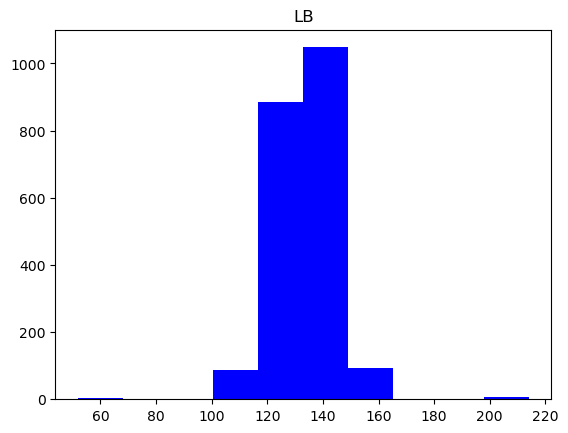

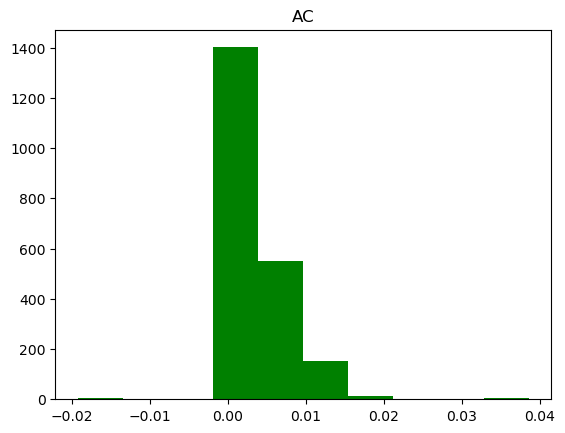

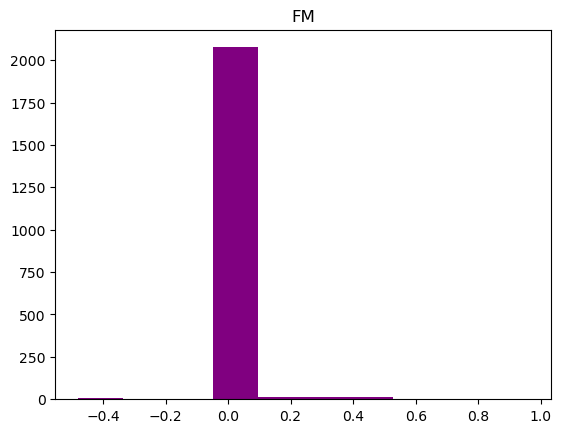

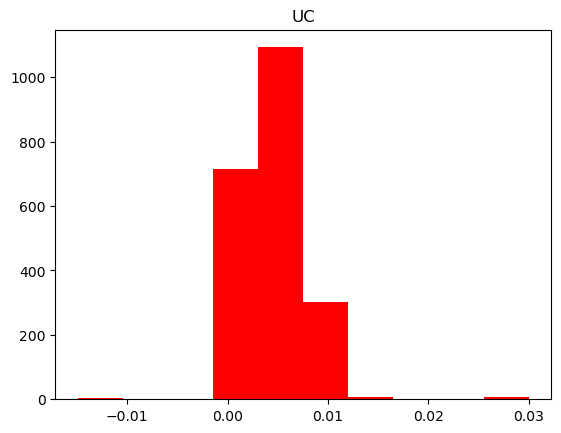

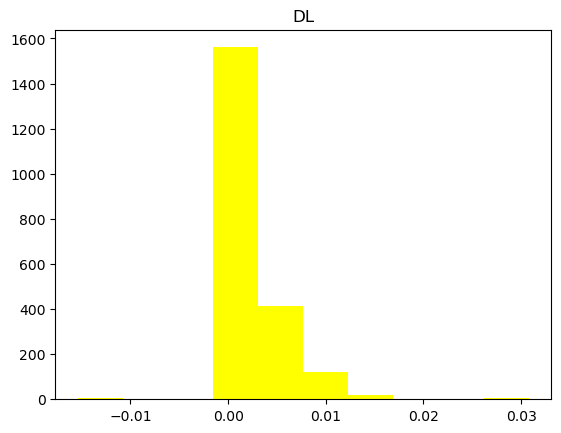

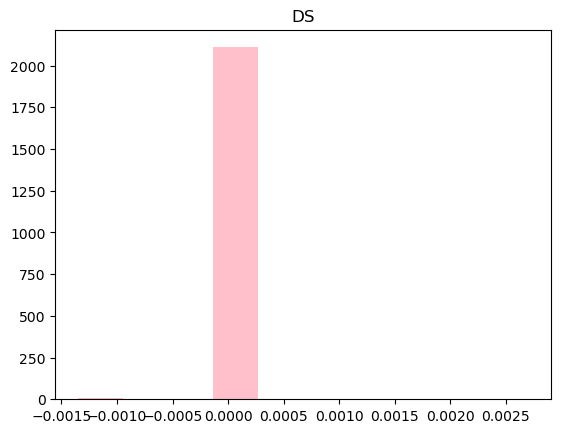

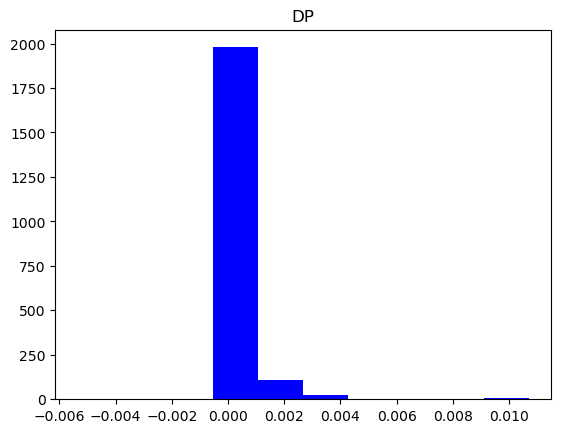

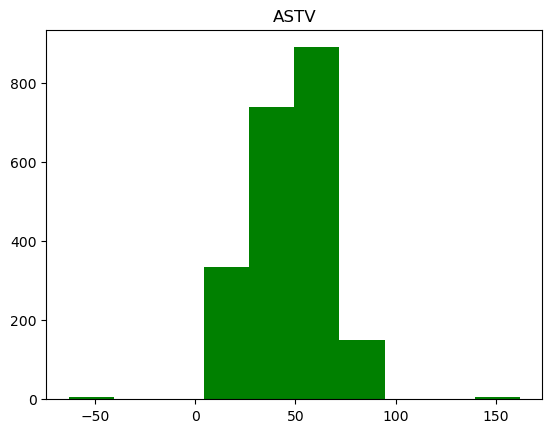

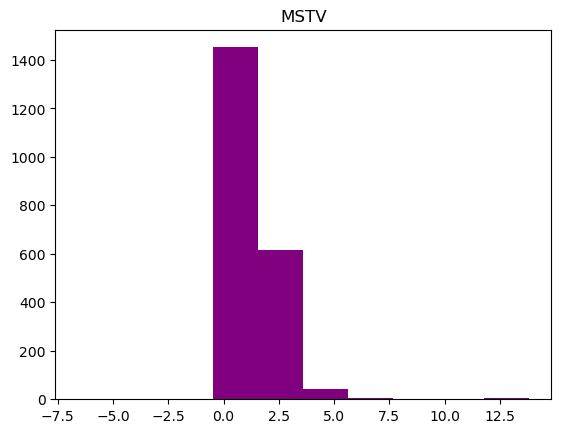

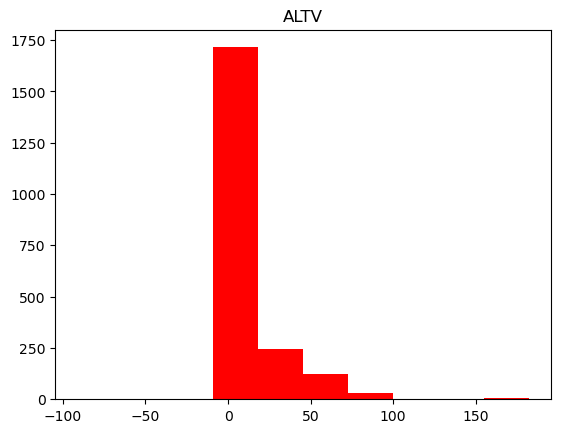

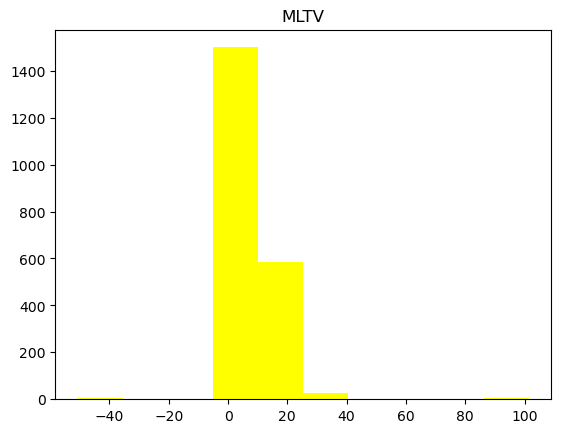

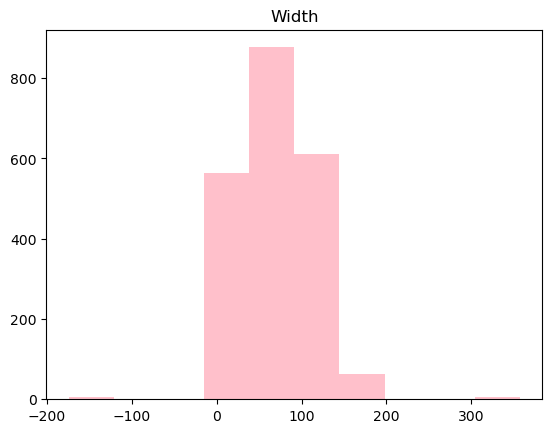

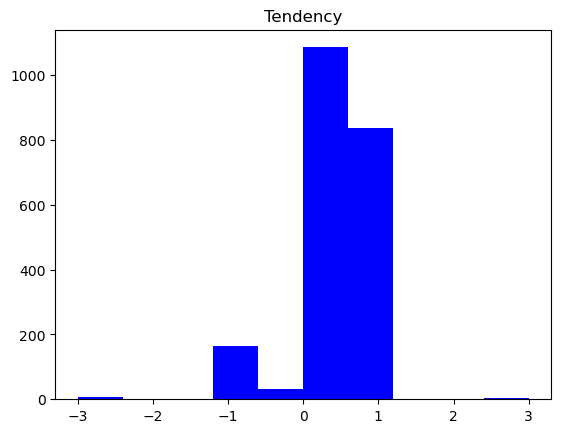

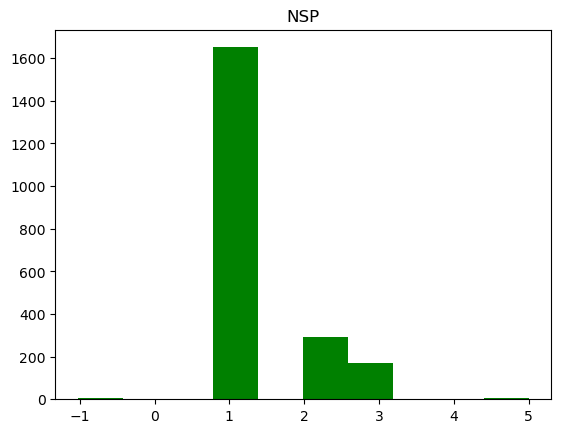

In [16]:
colors=['blue','green','purple','red','yellow','pink']#for different colors for each histogram
for index,column in enumerate(df1.columns):
    plt.hist(df1[column],color=colors[index%len(colors)])#takes each column and gives histogram
    plt.title(column)
    plt.show()
    print()

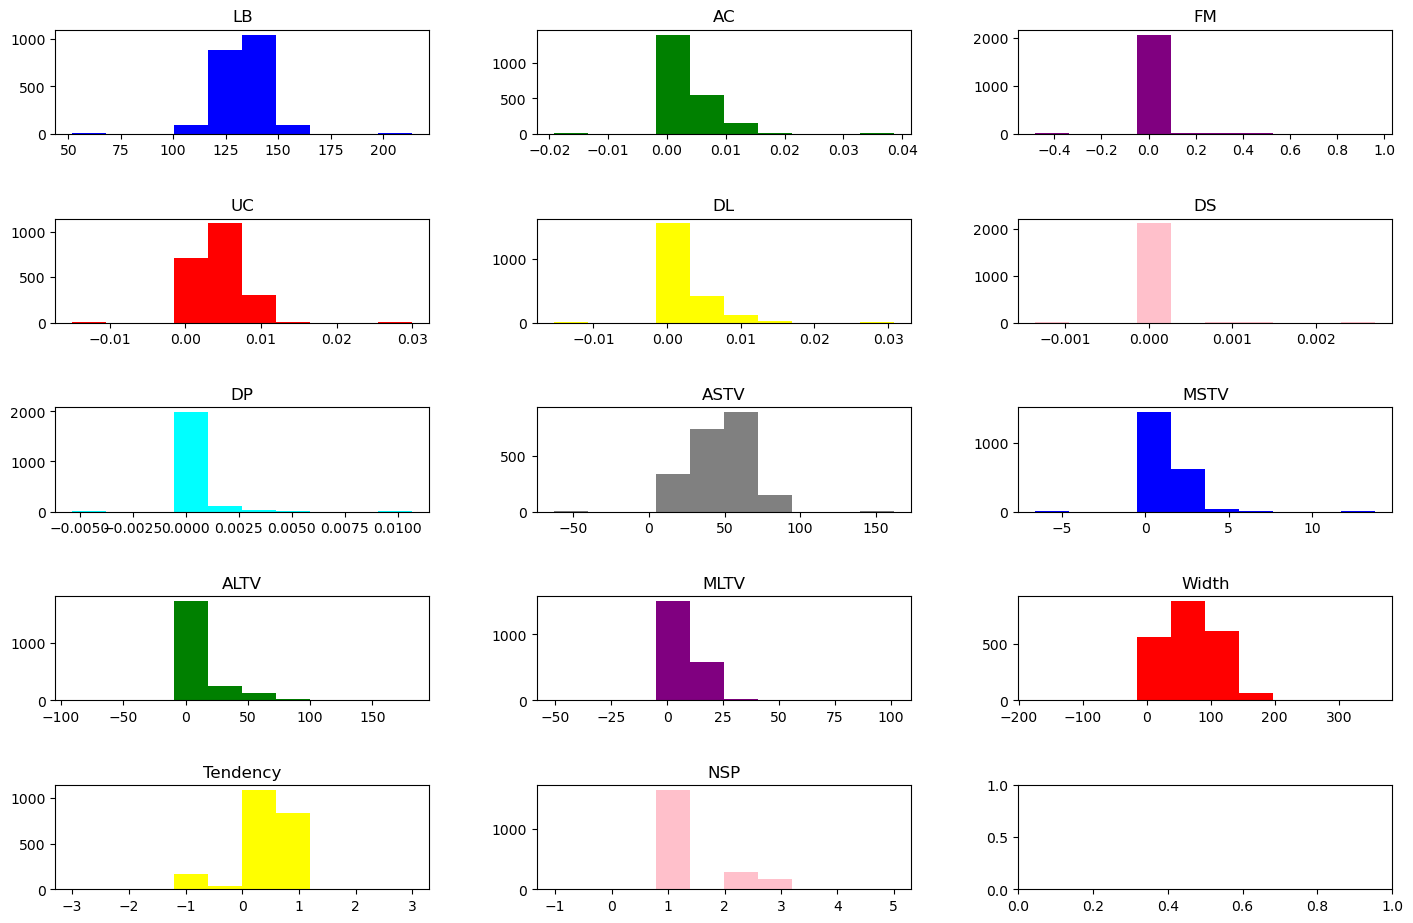

In [17]:
#creating a dashboard of all the plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))  # Adjust rows and columns as needed
fig.tight_layout(pad=4.0)# this gives the space
colors=['blue','green','purple','red','yellow','pink','cyan','grey']# this is the color palatte
axes=axes.flatten()#for easy iteration of each column
for index,column in enumerate(df1.columns):
    if index<len(axes):#removes any extra spaces
        axes[index].hist(df1[column],color=colors[index%len(colors)])#plots each histogram and assigns color
        axes[index].set_title(column)#sets the title
plt.show()


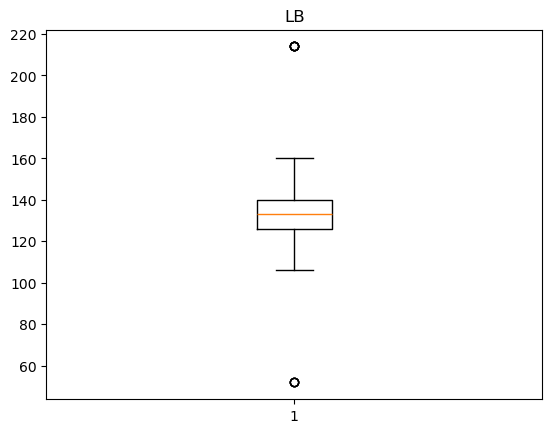

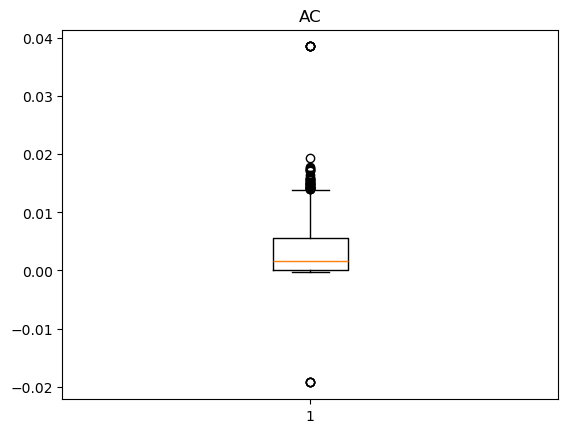

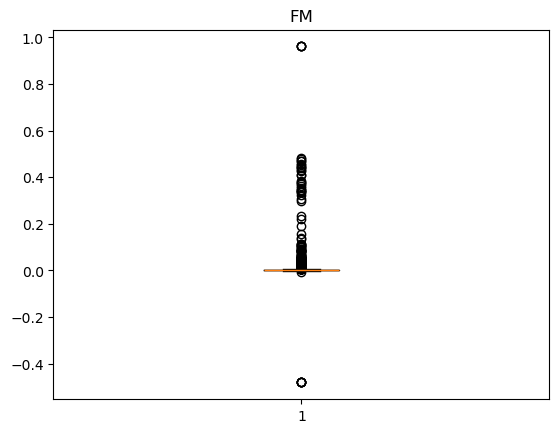

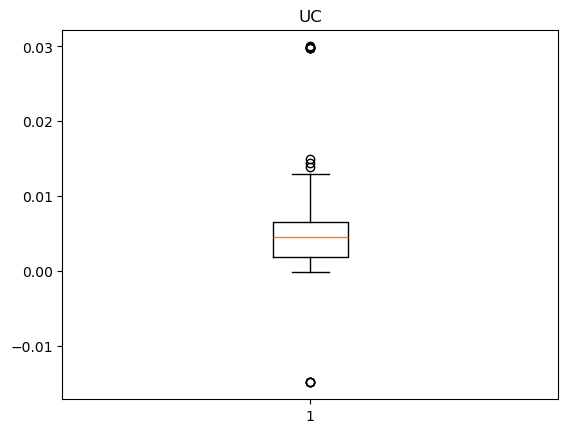

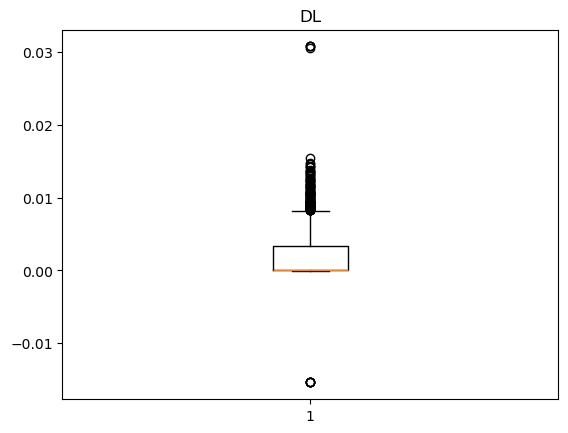

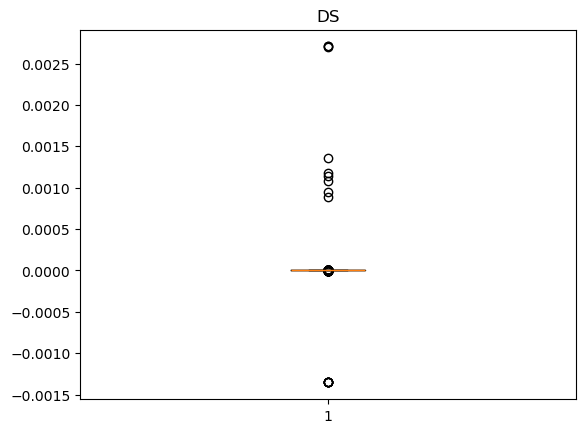

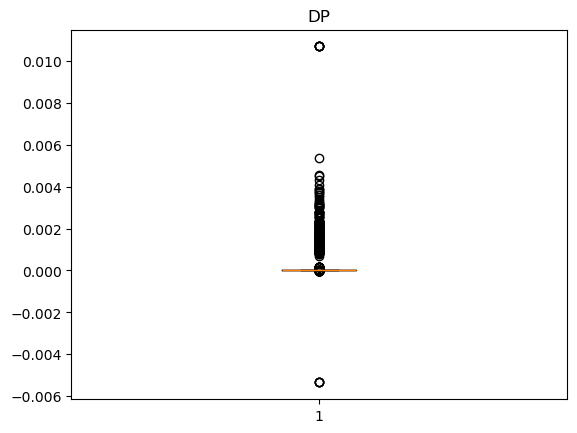

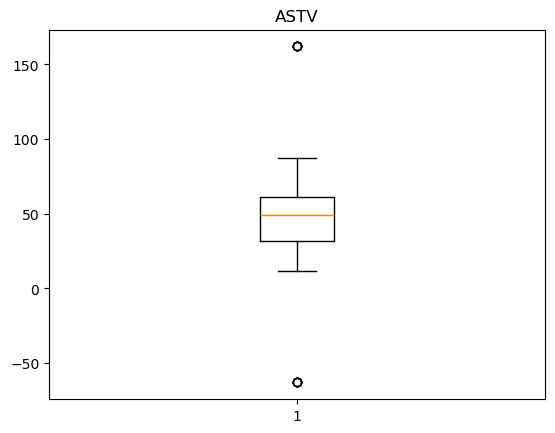

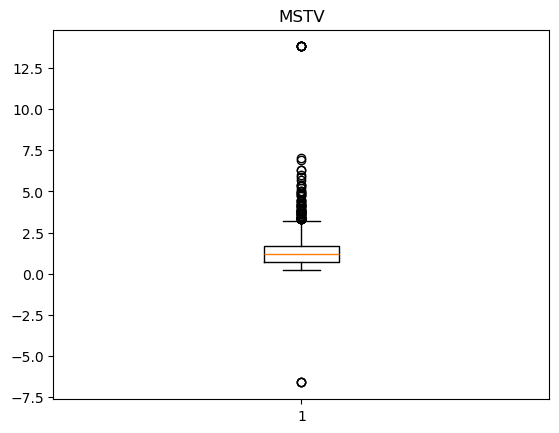

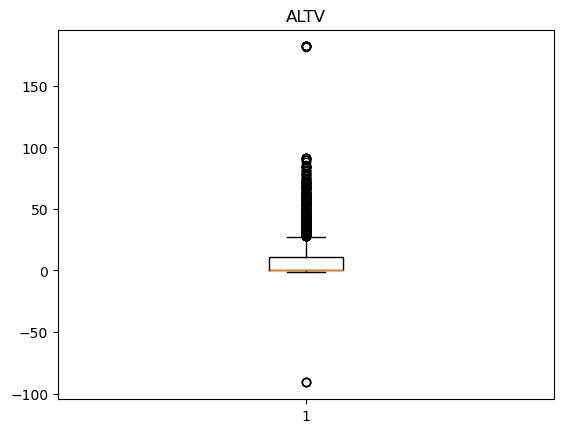

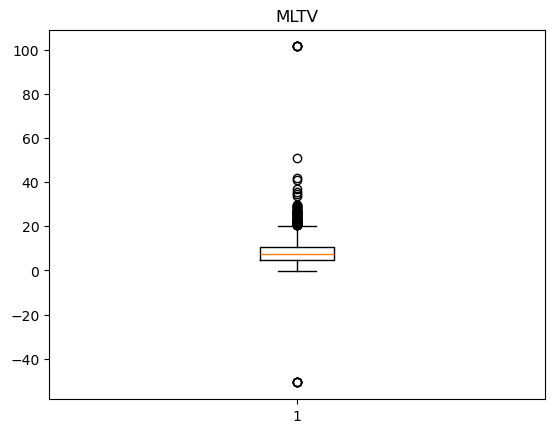

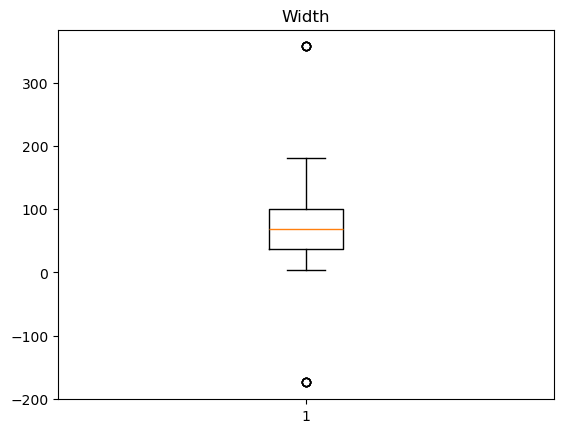

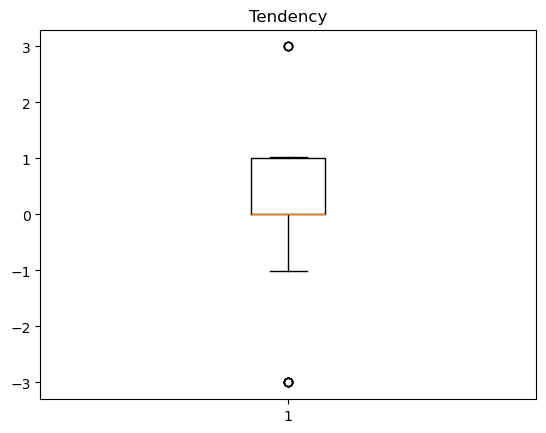

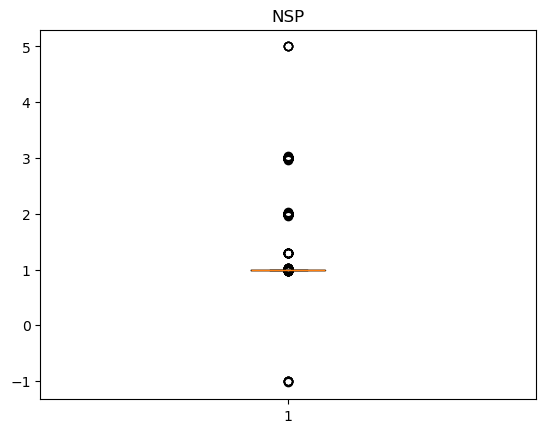

In [18]:
for column in df1.columns:
    plt.boxplot(df1[column])
    plt.title(column)
    plt.show()
    print()

In [24]:
#for finding wheteher there is a possibility of creating a bar chat or not 
#first after looking at the info we can conclude that there are not categorial
#value there is a other techinque which shows if there are continuous value tho 
#they are performing as categorical or not for column in df1.columns:
for column in df1.columns:
    print(f"column '{column}' value counts:")
    print(df1[column].value_counts())
    print("\n")

column 'LB' value counts:
LB
133.000000    129
130.000000    105
122.000000    103
138.000000     98
125.000000     87
             ... 
140.090770      1
123.159931      1
122.645790      1
136.142989      1
124.919186      1
Name: count, Length: 154, dtype: int64


column 'AC' value counts:
AC
0.000000    833
0.003219     20
0.000834     13
0.005838      9
0.005004      9
           ... 
0.008006      1
0.012431      1
0.011986      1
0.003330      1
0.001616      1
Name: count, Length: 1068, dtype: int64


column 'FM' value counts:
FM
 0.000000    1232
 0.000834      10
 0.001668       9
 0.003336       9
 0.005838       7
             ... 
 0.001229       1
 0.028708       1
 0.002894       1
-0.000519       1
-0.000188       1
Name: count, Length: 776, dtype: int64


column 'UC' value counts:
UC
0.000000    318
0.000834     24
0.001668     15
0.002502     12
0.004170     10
           ... 
0.008287      1
0.008242      1
0.008006      1
0.006211      1
0.006110      1
Name: count,

In [26]:
#this shows the correlation between each variable present the dataset
df1.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357


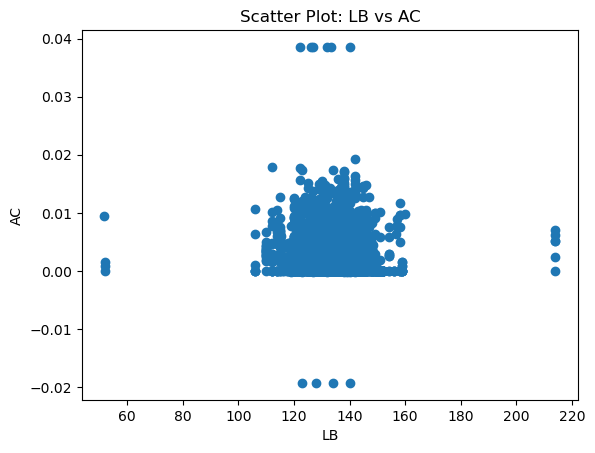

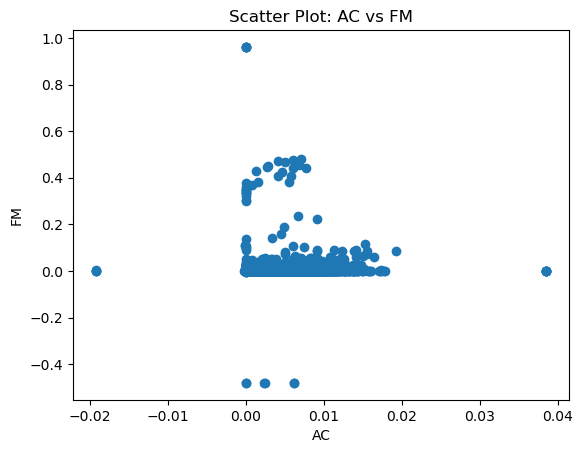

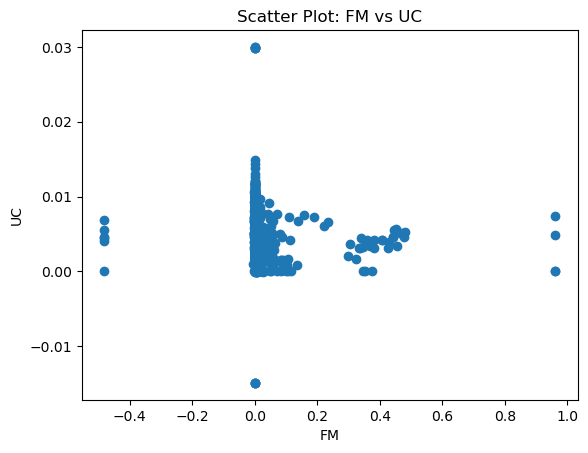

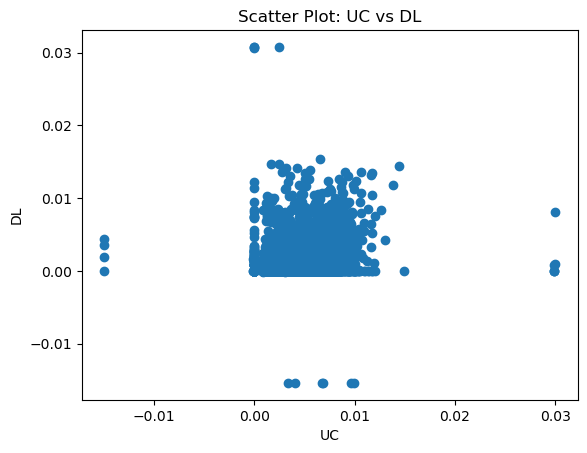

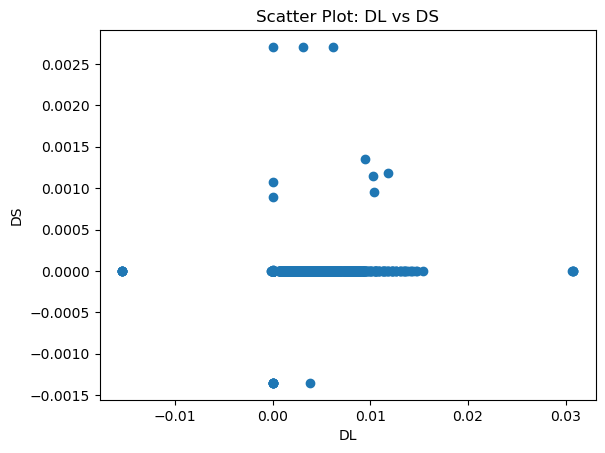

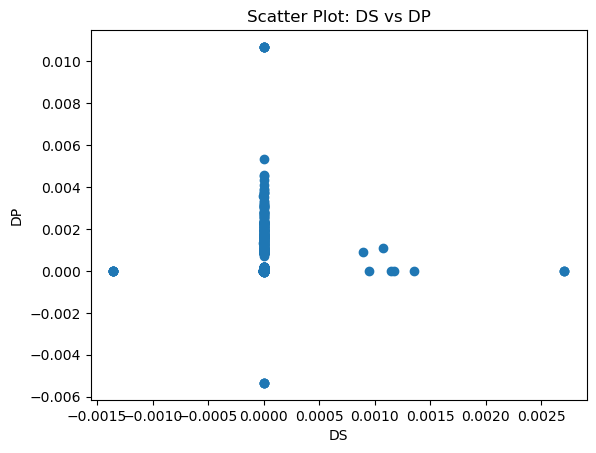

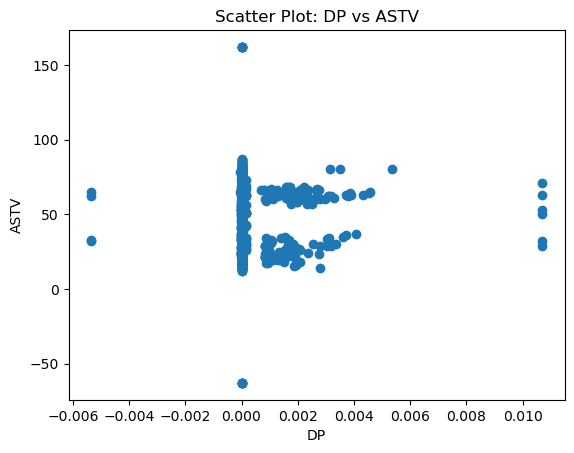

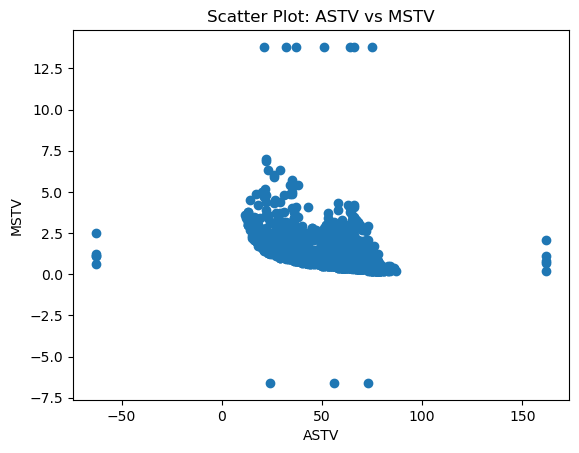

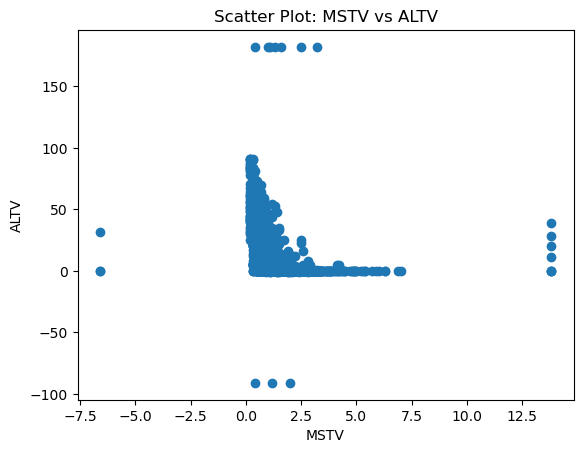

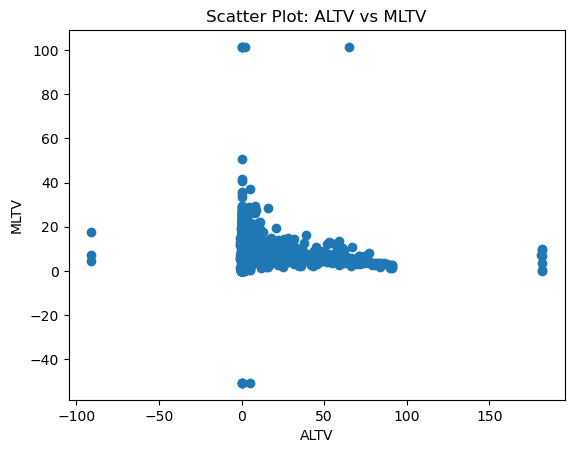

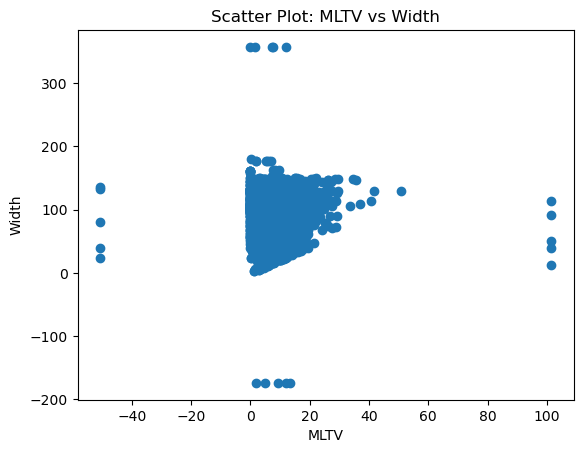

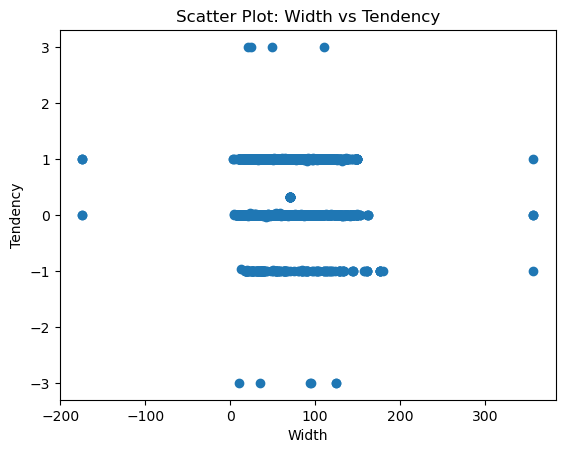

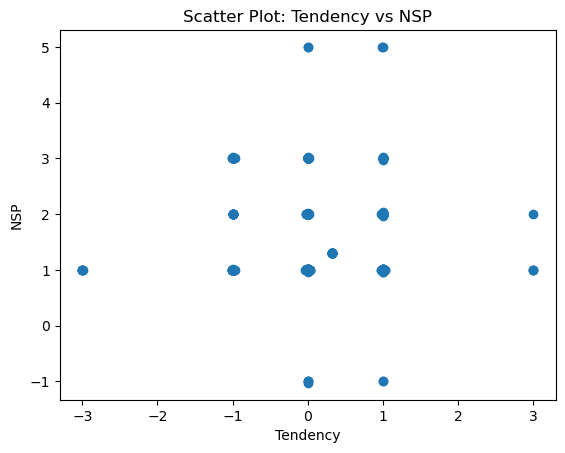

In [28]:
#calculating the correlation matrix
corr_matrix = df1.corr()

# Loop through each column and create a scatter plot
for column in df1.columns:
    # Use df[column] as X, select another column as Y (example: second column)
    if df1.columns.tolist().index(column) < len(df1.columns) - 1:  # Ensure thereis a next column
        next_column = df1.columns[df1.columns.tolist().index(column) + 1]  # Get next column
                                #.tolist() method is a pandas funstion that convert a series of column in list
        X = df1[column]
        Y = df1[next_column]  # Use next column for scatter plot
    
        plt.scatter(X, Y)  # Scatter plot
        plt.xlabel(column)   #create a xlabel as column name
        plt.ylabel(next_column)  #create a y label with column name
        plt.title(f"Scatter Plot: {column} vs {next_column}")  #cfreating a title of every scatter plot
        plt.show()

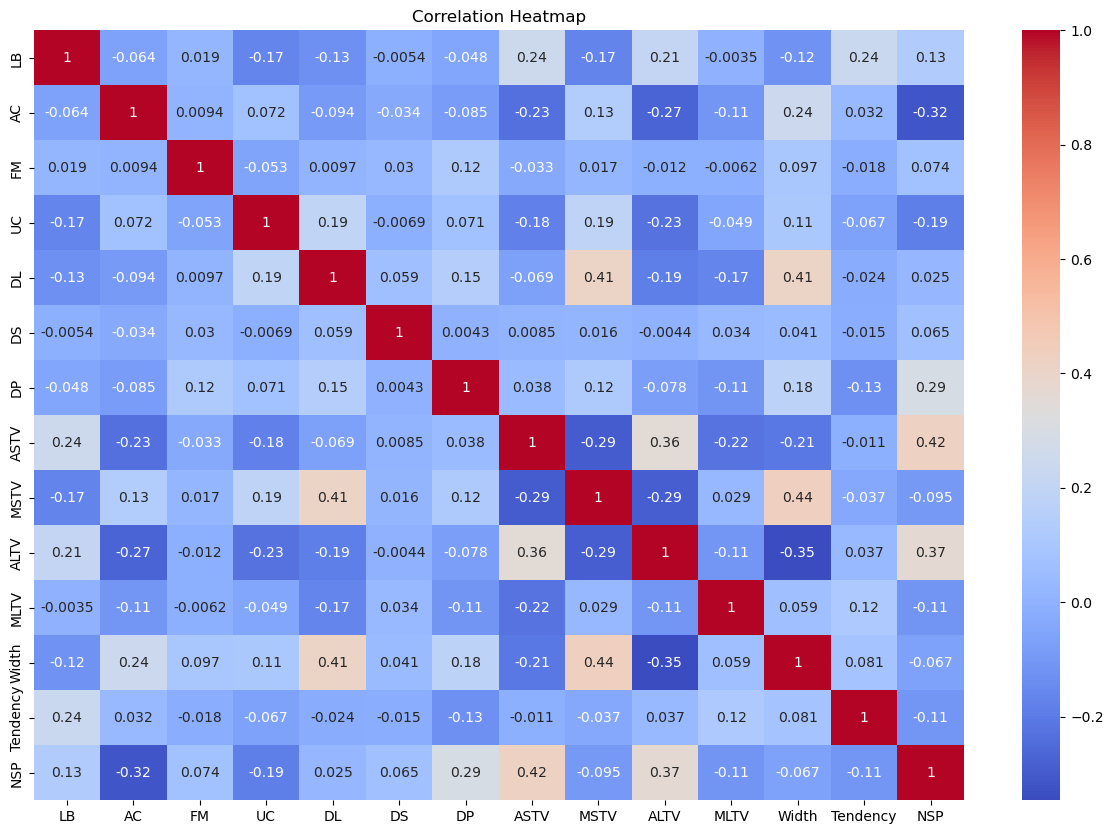

In [30]:
plt.figure(figsize=(15,10))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

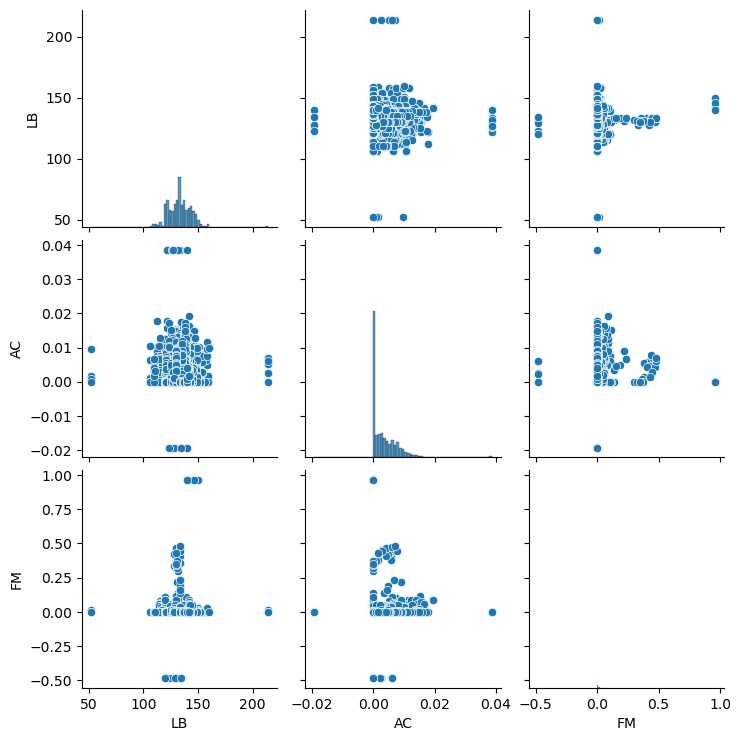

In [33]:
#pair plot is used to visualize the pairwise relationship in dataset used
#for coorelation distribution 
sns.pairplot(df1.iloc[:,0:3],palette='green')  
plt.show()

#the diagnolas show the histograms and others shows the scatter plots

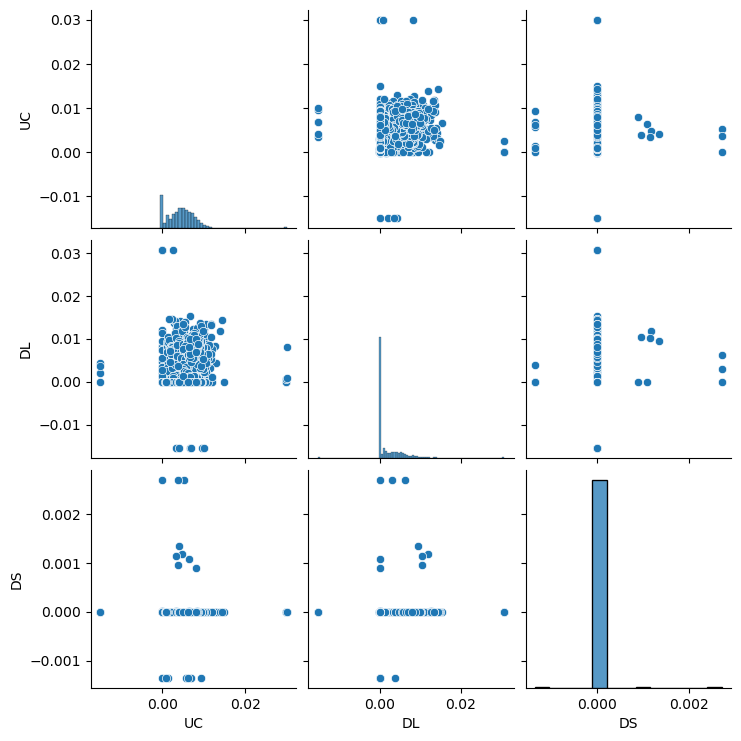

In [35]:
sns.pairplot(df1.iloc[:,3:6],palette='green')  
plt.show()

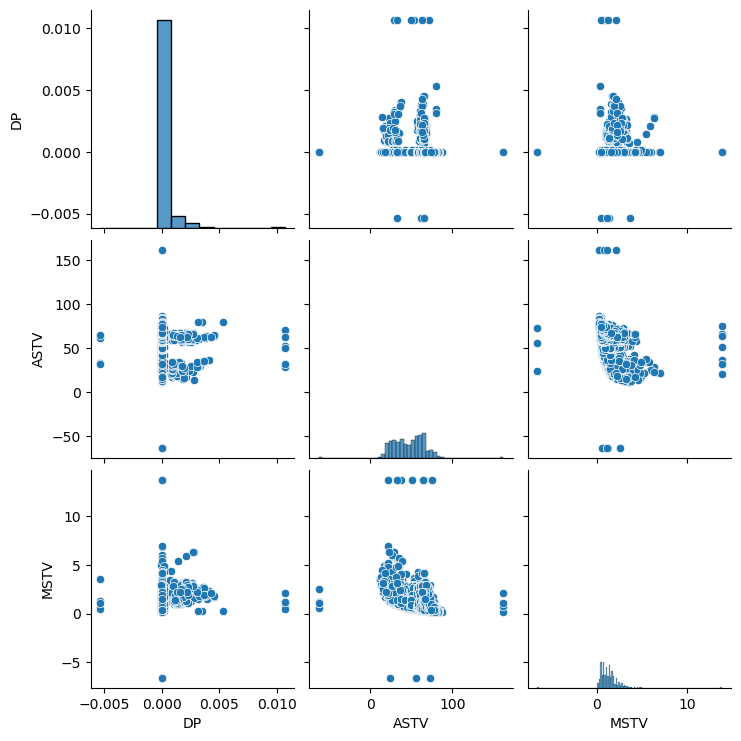

In [37]:
sns.pairplot(df1.iloc[:,6:9],palette='green')  
plt.show()

4.Pattern Recognition and Insights: ● Identify any correlations between variables and discuss their potential implications. ● Look for trends or patterns over time if temporal data is available. Conclusion:Summarize the key insights and patterns discovered through your exploratory analysis.● Discuss how these findings could impact decision-making or further analyses.

In [40]:
df1.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357


In [42]:
#from the given data wwe cant find trends/patterns over time because
#trends/patterns arAe found when there a column which specify a time period 

In [44]:
correlation_matrix = df1.corr()

# Find correlations greater than 0.5 or less than -0.5
high_correlations = correlation_matrix[((correlation_matrix > 0.5) | (correlation_matrix < -0.5)) & (correlation_matrix !=1.0)]

print("Correlations greater than 0.5 or less than -0.5:")
high_correlations

Correlations greater than 0.5 or less than -0.5:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
correlation_matrix = df1.corr()

# Find correlations greater than 0.4 or less than -0.4
high_correlations = correlation_matrix[((correlation_matrix > 0.4) | (correlation_matrix < -0.4)) & (correlation_matrix !=1.0)]

print("Correlations greater than 0.4 or less than -0.4:")
high_correlations

Correlations greater than 0.4 or less than -0.4:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.410102,NaN,NaN,0.408664,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421313
MSTV,NaN,NaN,NaN,NaN,0.410102,NaN,NaN,NaN,NaN,NaN,NaN,0.433064,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
